## Codes to reproduce the descriptive figure

### Figure 1 Cumulative residential solar capacity from 2000 to 2023

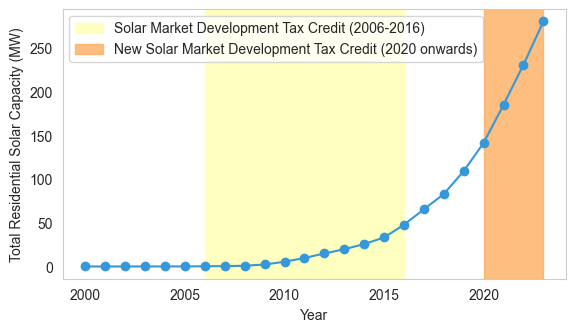

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

# Plotting the data
plt.figure(figsize=(6.5, 3.5))
plt.plot(yearly_capacity['installation_year'], yearly_capacity['cumulative_capacity_MW'], marker='o', color='#3498db')
# plt.title('Cumulative System Capacity by Year')
plt.xlabel('Year')
plt.ylabel('Total Residential Solar Capacity (MW)')

# Adding shaded areas for the state solar tax credit periods
plt.axvspan(2006, 2016, color='#ffffbf', alpha=1, label='Solar Market Development Tax Credit (2006-2016)')
plt.axvspan(2020, yearly_capacity['installation_year'].max(), color='#fdae61', alpha=0.8, label='New Solar Market Development Tax Credit (2020 onwards)')

# Remove grid lines
plt.grid(False)

# Adding legend
plt.legend()
plt.savefig('F1.cumulative_capacity.png', dpi=300, bbox_inches='tight')
plt.show()

### Figure 2 Installed systems by credit claim status and total credit claimed between 2010 and 2023

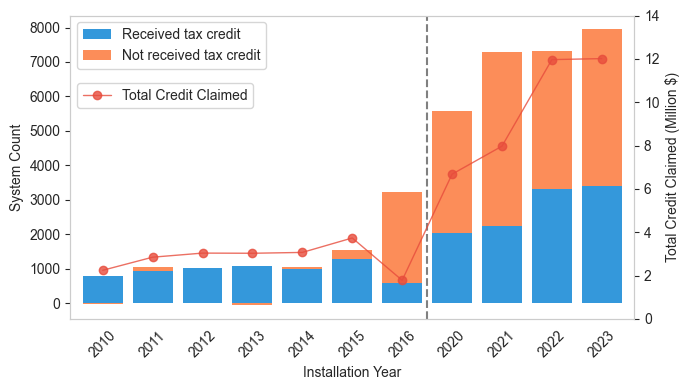

In [8]:
columns_to_plot_2010 = pd.read_csv('credit_claim.csv')
# Plotting the stacked bar plot

# Create a figure with specified size
fig, ax = plt.subplots(figsize=(7, 4))

columns_to_plot_2010[['Received tax credit', 'Not received tax credit']].plot(kind='bar', stacked=True, ax=ax, color=['#3498db', '#fc8d59'],width=0.8, edgecolor = 'none')
ax.set_xlabel('Installation Year')
ax.set_ylabel('System Count')
ax.legend(loc='upper left')

# Manually set the x-axis ticks
ax.set_xticks(columns_to_plot_2010.index)
ax.set_xticklabels(columns_to_plot_2010['installation_year'], rotation=45)
ax.grid(False)

# Add a dashed vertical line after 2016
# Find the index for the year 2016
index_2016 = columns_to_plot_2010[columns_to_plot_2010['installation_year'] == 2016].index[0]
ax.axvline(x=index_2016 + 0.5, color='gray', linestyle='--')

# Add a secondary y-axis for the line plot
ax2 = ax.twinx()
ax2.plot(columns_to_plot_2010.index, columns_to_plot_2010['tax_credit_residential']/1000000, color='#e74c3c', marker='o', 
         alpha = 0.8, label='Total Credit Claimed', linewidth=1)
ax2.set_ylabel('Total Credit Claimed (Million $)')
ax2.legend(loc='upper left', bbox_to_anchor=(0, 0.8))
ax2.set_ylim(0, 14)  # Setting the y-axis range from 0 to 12 million
ax2.grid(False)
plt.savefig('F2.credit_claim.png', dpi=300, bbox_inches='tight')  # Save as PNG file with 300 DPI

# Show the plot
plt.tight_layout()
plt.show()

### Figure 3 Concentration Curves of Solar Tax Credit
Construct the concentration index of tax credit claim by income quintile.

Divide 2010 census tracts into 5 groups by income quintile
Use the system - tract_2010 mapping to identify which income quintile the system is in
Sum all credits claimed by income quintile
Plot the concentration curve
Calculate concentration index

This approach follows Borenstein 2016 paper.

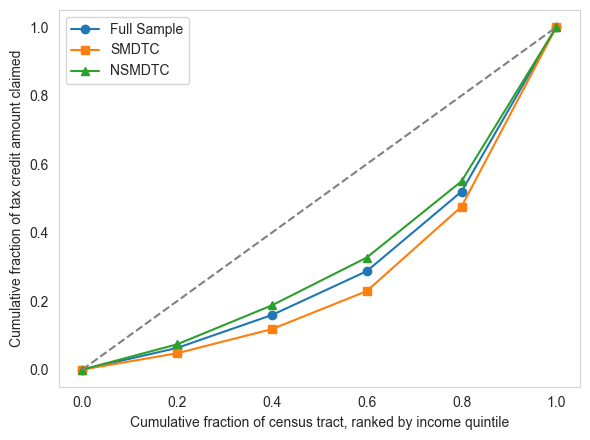

In [21]:
def calculate_cumulative_fractions(df):

    # Calculate the total number of credit claims
    total_credits = df['tax_credit_state'].sum()
    
    # Calculate the share of credit claims in each quintile
    quintile_shares = df.groupby('inc_quintile_housing_weighted')['tax_credit_state'].sum() / total_credits
    
    cumulative_quintiles = np.linspace(0, 1, len(quintile_shares) + 1)
    cumulative_credits = np.insert(quintile_shares.cumsum().values, 0, 0)
    
    return cumulative_quintiles, cumulative_credits

cumulative_quintiles_full, cumulative_credits_full = calculate_cumulative_fractions(emnrd_by_income_distribution)
cumulative_quintiles_smdtc, cumulative_credits_smdtc = calculate_cumulative_fractions(SMDTC)
cumulative_quintiles_nsmdtc, cumulative_credits_nsmdtc = calculate_cumulative_fractions(NSMDTC)

# Plot the cumulative fractions
plt.figure(figsize=(6, 4.5))

plt.plot(cumulative_quintiles_full, cumulative_credits_full, label='Full Sample', marker='o')
plt.plot(cumulative_quintiles_smdtc, cumulative_credits_smdtc, label='SMDTC', marker='s')
plt.plot(cumulative_quintiles_nsmdtc, cumulative_credits_nsmdtc, label='NSMDTC', marker='^')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')

plt.xlabel('Cumulative fraction of census tract, ranked by income quintile')
plt.ylabel('Cumulative fraction of tax credit amount claimed')
# plt.title('Cumulative Fraction of Credits by Zestimate Quintile')
plt.legend(facecolor='white')
plt.tight_layout()
plt.grid(False)

# Change the color of the box (spines) around the graph to light gray
ax = plt.gca()
ax.spines['top'].set_color('lightgray')
ax.spines['right'].set_color('lightgray')
ax.spines['bottom'].set_color('lightgray')
ax.spines['left'].set_color('lightgray')

plt.savefig('F3.credit_claim_amount_distribution_by_income.png', dpi=300, bbox_inches='tight') 

# Show plot
plt.show()

### Figure 4 Decompose the full effect by adoption effect and distribution effect

Check how much of the concentration can be explained by adoption disparity across income quintiles. That is, what is the concentration curve of percentage of systems installed. For the full sample only

In [62]:
def calculate_cumulative_fractions_2(df):
    
    # Calculate the total number of credit claims
    total_credits = df.shape[0]
    
    # Calculate the share of credit claims in each quintile
    quintile_shares = df.groupby('inc_quintile_housing_weighted')['uid'].count() / total_credits
    
    cumulative_quintiles = np.linspace(0, 1, len(quintile_shares) + 1)
    cumulative_credits = np.insert(quintile_shares.cumsum().values, 0, 0)
    
    return cumulative_quintiles, cumulative_credits

cumulative_quintiles_full_2, cumulative_credits_full_2 = calculate_cumulative_fractions_2(credit_years_data)

KeyError: ['inc_quintile_housing_weighted']

In [24]:
def calculate_cumulative_fractions_3(df):
    # Calculate the total number of credit claims
    
    quintile_claim_total = df.groupby('inc_quintile_housing_weighted')['tax_credit_state'].sum()
    quintile_count = df.groupby('inc_quintile_housing_weighted')['uid'].count()
    quintile_claim_average = quintile_claim_total/quintile_count
    
    quintile_shares = quintile_claim_average / (quintile_claim_average.sum())
    
    cumulative_quintiles = np.linspace(0, 1, len(quintile_shares) + 1)
    cumulative_credits = np.insert(quintile_shares.cumsum().values, 0, 0)
    
    return cumulative_quintiles, cumulative_credits
cumulative_quintiles_full_3, cumulative_credits_full_3 = calculate_cumulative_fractions_3(credit_years_data)


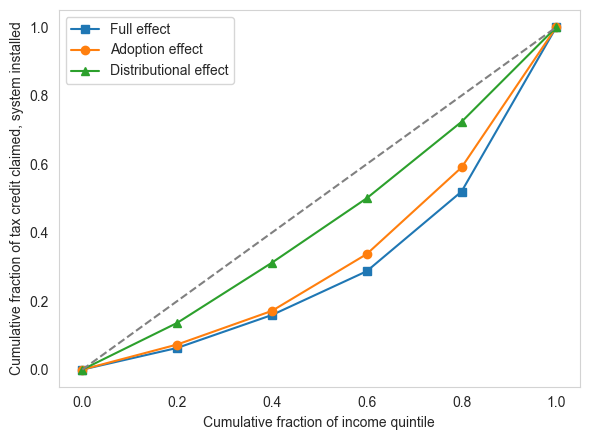

In [25]:
# Plot the cumulative fractions
plt.figure(figsize=(6, 4.5))

plt.plot(cumulative_quintiles_full, cumulative_credits_full, label='Full effect', marker='s')
plt.plot(cumulative_quintiles_full_2, cumulative_credits_full_2, label='Adoption effect', marker='o')
plt.plot(cumulative_quintiles_full_3, cumulative_credits_full_3, label='Distributional effect', marker='^')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')

plt.xlabel('Cumulative fraction of income quintile')
plt.ylabel('Cumulative fraction of tax credit claimed, system installed')
# plt.title('Cumulative Fraction of Credits by Zestimate Quintile')
plt.legend(facecolor='white')
plt.tight_layout()
plt.grid(False)

# Change the color of the box (spines) around the graph to light gray
ax = plt.gca()
ax.spines['top'].set_color('lightgray')
ax.spines['right'].set_color('lightgray')
ax.spines['bottom'].set_color('lightgray')
ax.spines['left'].set_color('lightgray')

plt.savefig('F4.disentangle_adoption_distributional_effect.png', dpi=300, bbox_inches='tight') 

# Show plot
plt.show()

### Figure A1 Correlation matrix between regression variables in the distributional equity analysis

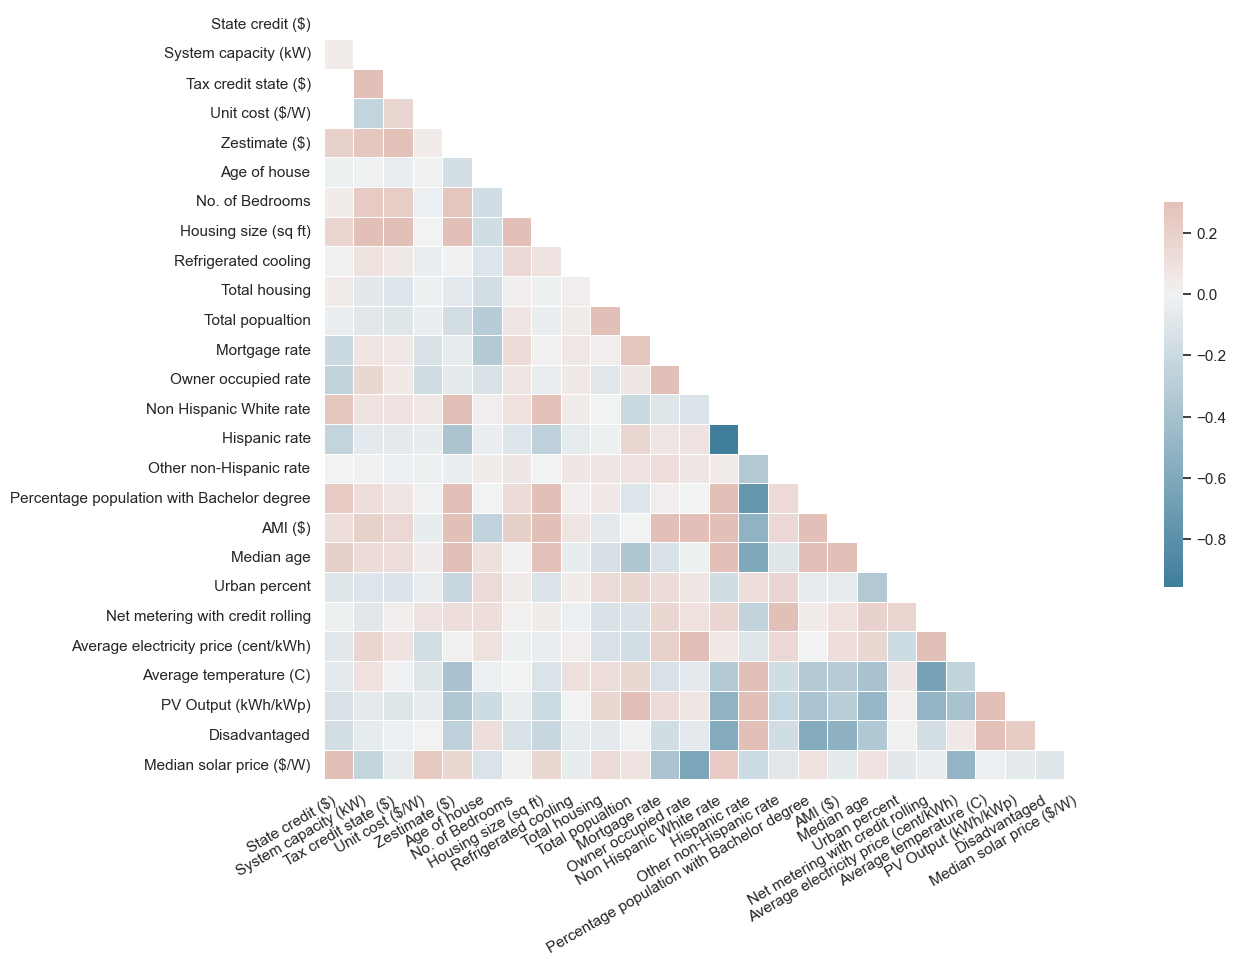

In [101]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

sns.set_theme(style="white")

# Calculate the correlation matrix
corr_matrix = data_for_summary_credit.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(18, 10))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr_matrix, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar=False,
            xticklabels=descriptive_names_reg_credit, yticklabels=descriptive_names_reg_credit)

# Rotate the x-axis labels
plt.xticks(rotation=30, ha='right')


# Add the color bar to the new axis
sns.heatmap(corr_matrix, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5},
            xticklabels=descriptive_names_reg_credit, yticklabels=descriptive_names_reg_credit)
plt.xticks(rotation=30, ha='right')

# plt.title('Correlation Matrix')

plt.savefig('SF.corr_matrix_model.png', dpi=300, bbox_inches='tight')  # Save as PNG file with 300 DPI

plt.show()

### Figure 6  Equilibrium price and capacity trend in the SMDTC and NSMDTC

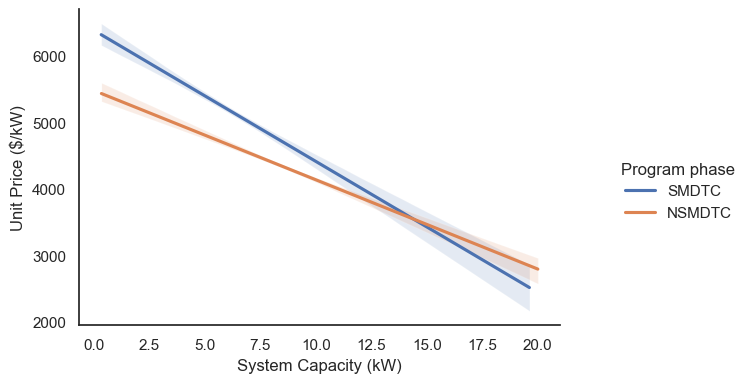

In [6]:
# Set the seaborn style
import seaborn as sns
sns.set(style="white")

# Create a scatter plot with a linear fit line for each year
plot = sns.lmplot(x='system_capacity', y='system_cost_unit', hue='data_source_file', data=intensive_margin_merge_price_installer, scatter=False, height=4, aspect=1.5, scatter_kws={'s': 5, 'alpha': 0.3} )

# Customize the legend title and labels
new_labels = ['SMDTC', 'NSMDTC']
legend = plot._legend
legend.set_title('Program phase')  # Change the legend title
for t, l in zip(legend.texts, new_labels): t.set_text(l)  # Set new labels

# Add title and labels
# plt.title('Scatter Plot of Price vs. Quantity with Linear Fit by Year')
plt.xlabel('System Capacity (kW)')
plt.ylabel('Unit Price ($/kW)')

plt.savefig('equilibrium_price.png', dpi=300, bbox_inches='tight')
# Show the plot
plt.show()

### Figure A2 Density of installed system capacity by program phase

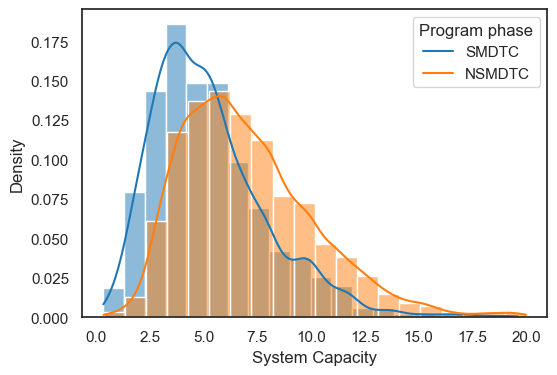

In [56]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set Seaborn style
sns.set(style="white")

# Define the color palette (blue and orange)
colors = ['#1f77b4', '#ff7f0e']  # Blue and orange from the default Seaborn color palette

# Create a figure and axis
fig, ax1 = plt.subplots(figsize=(6, 4))

# Plot the density of system_capacity separately for each group using the defined color scheme
for (label, df_subset), color in zip(intensive_margin_merge_price_installer.groupby('data_source_file'), colors):
    sns.histplot(df_subset['system_capacity'], bins=20, kde=True, ax=ax1, color=color, stat='density', alpha=0.5, label=label)

# Add labels for the plot
ax1.set_xlabel('System Capacity')
ax1.set_ylabel('Density')

# Customize the legend
new_labels = ['SMDTC', 'NSMDTC']
ax1.legend(title='Program phase', labels=new_labels)

# Save the figure
plt.savefig('grouped_density_orange_blue_plot.png', dpi=300, bbox_inches='tight')

# Show the plot
plt.show()